<a href="https://colab.research.google.com/github/Raries16/IMDB-Sentiment-/blob/main/sentiment_analysis_of_imdb_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis of IMDB Movie Reviews**

In [1]:
#Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Changing Directory
%cd /content/gdrive/My Drive/Kaggle/IMDB_review/

/content/gdrive/My Drive/Kaggle/IMDB_review


**Import necessary libraries**

In [3]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')


**Import the training dataset**

In [4]:
#importing the training data
df=pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**Text normalization**

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [11]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [12]:
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

**Removing special characters**

In [13]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [14]:
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [15]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [16]:
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

In [17]:
df.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,A wonder littl product the film techniqu is ve...,positive
2,I thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


In [18]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

{'into', "didn't", 'ours', "shan't", 'yours', 'wouldn', 'doesn', 'should', 'down', 'o', 'on', "you've", 'i', 'll', 'myself', 'by', 'for', 'once', "needn't", 'those', 'to', 'him', 'has', 'weren', 'until', 'itself', 'of', 'at', 'same', 'just', 'out', 'between', 'very', 'do', 'their', 'in', 'is', 'that', 'hasn', 'mightn', 'couldn', 'does', 'y', 'these', 'needn', "wouldn't", 'don', 'or', "it's", "won't", 'yourselves', 'this', 'an', 'd', "aren't", 'as', 'me', "hasn't", 'few', 'ourselves', 'most', "you'll", 'herself', 'and', 'we', 'it', "should've", 'further', 'above', 'having', 'there', 'before', "you'd", 'off', 'mustn', "weren't", 'yourself', 'not', 'his', "wasn't", 'any', 'no', 'so', 's', 'its', 'a', "you're", "couldn't", 'about', 'where', "haven't", 'they', 'she', 'more', 'are', "hadn't", 'doing', "that'll", 'hadn', 'haven', 'how', 'isn', 'if', 're', "don't", 'why', "she's", 'theirs', 'while', 'be', 'below', 'up', 'shouldn', 'then', 'didn', 'my', 'from', 'wasn', 'over', 'm', 'won', 'who'

In [19]:
df['review'] = df['review'].str.lower()

In [20]:
df.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl product the film techniqu is ve...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


In [21]:
df['review'] = df['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
df.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive


In [23]:
df.replace({'sentiment' : {'positive' : 0 , 'negative' : 1}} , inplace = True)

In [24]:
df.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,0
1,wonder littl product film techniqu veri unassu...,0
2,thought thi wa wonder way spend time hot summe...,0
3,basic famili littl boy jake think zombi hi clo...,1
4,petter mattei love time money visual stun film...,0


# Word Embedding

In [25]:
df1 = df[0:2]
df1.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,0
1,wonder littl product film techniqu veri unassu...,0


In [26]:
count = CountVectorizer()

In [27]:
review_count = count.fit_transform(df1.review)

In [28]:
print(count.vocabulary_)
print(review_count.toarray())

{'one': 119, 'review': 147, 'ha': 77, 'mention': 106, 'watch': 196, 'oz': 124, 'episod': 46, 'youll': 207, 'hook': 85, 'right': 148, 'thi': 179, 'exactli': 49, 'happen': 79, 'meth': 108, 'first': 60, 'thing': 180, 'struck': 172, 'wa': 195, 'brutal': 11, 'unflinch': 189, 'scene': 152, 'violenc': 193, 'set': 159, 'word': 201, 'go': 70, 'trust': 185, 'show': 163, 'faint': 55, 'heart': 81, 'timid': 181, 'pull': 138, 'punch': 139, 'regard': 145, 'drug': 39, 'sex': 160, 'hardcor': 80, 'classic': 19, 'use': 190, 'wordit': 202, 'call': 12, 'nicknam': 117, 'given': 68, 'oswald': 123, 'maximum': 104, 'secur': 156, 'state': 170, 'penitentari': 128, 'focus': 62, 'mainli': 99, 'emerald': 43, 'citi': 17, 'experiment': 51, 'section': 155, 'prison': 135, 'cell': 13, 'glass': 69, 'front': 64, 'face': 53, 'inward': 88, 'privaci': 136, 'high': 83, 'agenda': 2, 'em': 42, 'home': 84, 'manyaryan': 102, 'muslim': 113, 'gangsta': 65, 'latino': 94, 'christian': 16, 'italian': 90, 'irish': 89, 'moreso': 111, 's

In [29]:
review_count = count.fit_transform(df.review)

In [30]:
tfidf = TfidfVectorizer(norm= False , smooth_idf= False)

In [31]:
review_tfidf = tfidf.fit_transform((df.review))

# Splitting the dataset

In [50]:
train_review_count = review_count[:40000]
train_review_tfidf = review_tfidf[:40000]
train_sentiment = df.sentiment[:40000]
print(train_review_count.shape)
print(train_review_tfidf.shape)
print(train_sentiment.shape)

(40000, 181713)
(40000, 181713)
(40000,)


In [51]:
test_review_count = review_count[40000:]
test_review_tfidf = review_tfidf[40000:]
test_sentiment = df.sentiment[40000:]
print(test_review_count.shape)
print(test_review_tfidf.shape)
print(test_sentiment.shape)

(10000, 181713)
(10000, 181713)
(10000,)


**Modelling the dataset**

# Model on Count Vectorizer

In [49]:
#Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(train_review_count , train_sentiment)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predicted_classes_lr = model_lr.predict(test_review_count)

[[4429  578]
 [ 576 4417]]


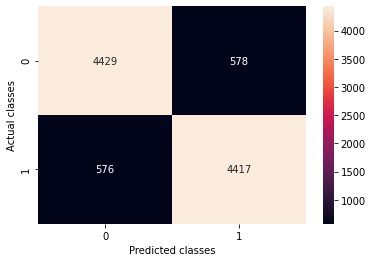

In [37]:
conf_mat_lr = confusion_matrix(test_sentiment.tolist() , predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [39]:
model_lr_score = accuracy_score(test_sentiment , predicted_classes_lr )
model_lr_score

0.8846

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
#Logistic Regression model after doing Hyperparameter tunig
grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25] , "penalty" : ["l1","l2"]}
grid_clf = GridSearchCV(model_lr, param_grid = grid_values,scoring = 'accuracy')
grid_clf.fit(train_review_count , train_sentiment)
print("Best parameters : %s" % grid_clf.best_params_)

Best parameters : {'C': 0.09, 'penalty': 'l2'}


In [43]:
best_grid = grid_clf.best_estimator_

In [46]:
predicted_classes_bestgrid = best_grid.predict(test_review_count)
predicted_classes_bestgrid

array([1, 1, 0, ..., 1, 0, 1])

[[4477  530]
 [ 561 4432]]


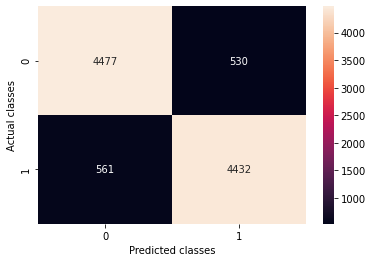

In [47]:
conf_mat_lr = confusion_matrix(test_sentiment.tolist() , predicted_classes_bestgrid)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [48]:
model_lr_bestgrid_score = accuracy_score(test_sentiment , predicted_classes_bestgrid )
model_lr_bestgrid_score

0.8909

# Model on TFIDF Vectorizer

In [52]:
#Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(train_review_tfidf , train_sentiment)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
predicted_classes_lr = model_lr.predict(test_review_tfidf)

[[4407  600]
 [ 603 4390]]


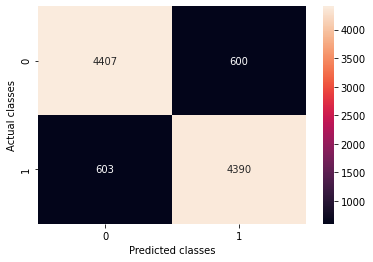

In [55]:
conf_mat_lr = confusion_matrix(test_sentiment.tolist() , predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [56]:
model_lr_score = accuracy_score(test_sentiment , predicted_classes_lr )
model_lr_score

0.8797

In [57]:
#Logistic Regression model after doing Hyperparameter tunig
grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25] , "penalty" : ["l1","l2"]}
grid_clf = GridSearchCV(model_lr, param_grid = grid_values,scoring = 'accuracy')
grid_clf.fit(train_review_tfidf , train_sentiment)
print("Best parameters : %s" % grid_clf.best_params_)

Best parameters : {'C': 0.001, 'penalty': 'l2'}


In [58]:
best_grid = grid_clf.best_estimator_

[[4477  530]
 [ 561 4432]]


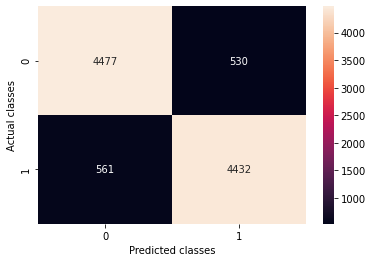

In [59]:
conf_mat_lr = confusion_matrix(test_sentiment.tolist() , predicted_classes_bestgrid)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [60]:
model_lr_bestgrid_score = accuracy_score(test_sentiment , predicted_classes_bestgrid )
model_lr_bestgrid_score

0.8909